In [109]:
import re
import numpy as np
import math
import scipy.spatial.distance

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\cohan\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Задание 1

In [80]:
with open('sentences.txt') as r:
    n = 0
    for line in r:
        print(n, line)
        n += 1

0 In comparison to dogs, cats have not undergone major changes during the domestication process.

1 As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.

2 A common interactive use of cat for a single file is to output the content of a file to standard output.

3 Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.

4 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

5 The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.

6 Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).

7 However, if the output is piped or redirected, cat is unnecessary.

8 cat with one named file is safer where human error is a conc

In [69]:
m = np.zeros((22, 254))

with open('sentences.txt') as r:
    list_of_words = []
    for line in r:
        line = line.lower()
        splined_line = [l for l in re.split('[^a-z]', line) if l != '']
        for word in splined_line:
            if word in list_of_words:
                continue
            else:
                list_of_words.append(word)
    r.seek(0)
    i = 0
    for line in r:
        line = line.lower()
        splined_line = [l for l in re.split('[^a-z]', line) if l != '']
        words_in_line = {}
        for word in splined_line:
            if word in words_in_line:
                words_in_line[word] += 1
            else:
                words_in_line[word] = 1
        for j, word in enumerate(list_of_words):
            if word in words_in_line:
                m[i][j] = words_in_line[word]
        i += 1
m

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]]
(22, 254)


In [196]:
best = 0
second_best = 0
minimal = 1
for i in range(1, m.shape[0]):
    dist = scipy.spatial.distance.cosine(m[0, :], m[i, :]) 
    if dist < minimal:
        second_best = best
        best = i
        minimal = dist
    print('Distance from 0 to {} is: {}'.format(i, round(dist, 3)))    
print(best, second_best)

Distance from 0 to 1 is: 0.953
Distance from 0 to 2 is: 0.864
Distance from 0 to 3 is: 0.895
Distance from 0 to 4 is: 0.777
Distance from 0 to 5 is: 0.94
Distance from 0 to 6 is: 0.733
Distance from 0 to 7 is: 0.926
Distance from 0 to 8 is: 0.884
Distance from 0 to 9 is: 0.906
Distance from 0 to 10 is: 0.833
Distance from 0 to 11 is: 0.88
Distance from 0 to 12 is: 0.84
Distance from 0 to 13 is: 0.87
Distance from 0 to 14 is: 0.874
Distance from 0 to 15 is: 0.944
Distance from 0 to 16 is: 0.841
Distance from 0 to 17 is: 0.957
Distance from 0 to 18 is: 0.944
Distance from 0 to 19 is: 0.889
Distance from 0 to 20 is: 0.843
Distance from 0 to 21 is: 0.825
6 4


In [195]:
scipy.spatial.distance.cosine?

In [101]:
with open('answer1.txt', 'w') as w:
    w.write(str(best) + ' ' + str(second_best))

## Задание 2

In [166]:
def function(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [168]:
y1 = function(1)
y2 = function(15)
print(y1, y2)

3.252216865271419 0.6352214195786656


In [186]:
print(a * 1 + b == y1)
print(a * 15 + b == y2)

True
False


In [163]:
a = y1 - b
(y1 - b) * 15 + b = y2
y1*15 - b*15 + b = y2
y1*15 - y2 = b*15 - b
y1*15 - y2 =b*14
(y1*15 - y2)/14 = b

In [181]:
b = (y1*15 - y2)/14
b

3.4391451113923304

In [182]:
a = y1 - b
a

-0.1869282461209112

In [188]:
print(a, b)

-0.1869282461209112 3.4391451113923304


In [178]:
x = np.array([[1, 1], [15, 1]])
y = np.array([function(1), function(15)])
a = np.linalg.solve(x, y)

In [179]:
a

array([-0.18692825,  3.43914511])

In [146]:
np.array([a, [1., 1.]]).T

array([[-0.18692825,  1.        ],
       [ 3.43914511,  1.        ]])

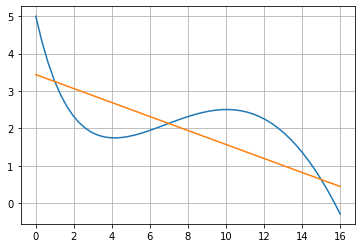

In [189]:
X = np.linspace(0, 16)
Y = function(X)
Y2 = round(a, 3)*X + round(b,3)


fig, ax = plt.subplots()
ax.grid()
ax.plot(X, Y)
ax.plot(X, Y2)

In [191]:
x = np.array([[1, 1, 1, 1], [1, 4, 16, 16*4], [1, 10, 100, 1000], [1, 15, 15*15, 15**3]])
y = np.array([function(1), function(4), function(10), function(15)])
a = np.linalg.solve(x, y)

In [194]:
a.round(2)

array([ 4.36, -1.3 ,  0.19, -0.01])